[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//akshatvishu/DiffusionModels/blob/master/forwardDiffusionProcess.ipynb)

In [1]:
#imports
import numpy as np
import scipy
from scipy.stats import norm, multivariate_normal

from PIL import Image

import matplotlib.pyplot as plt 
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use("seaborn")
seed=192022
np.random.seed(seed)

/tmp/ipykernel_307169/2880445606.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## Normal Distribution:

Notation : $\mathcal{N}\bm{(\mu ,\sigma^{2})}$


$\mu$: mean/expected value of distribution ; $\sigma$: Standard Deviation and $\sigma^{2}$: Variance .
Mean, μ controls the Gaussian’s center position and the standard deviation $\sigma$ controls the shape of the distribution

For real-valued random variable $x$, the PDF is defined as :
$$
p(x,\mu,\sigma^{2})= \dfrac{1}{\sigma\sqrt{2\pi}}\exp \big( \frac{1}{2}\big(\dfrac{x-\mu}{\sigma}\big)^{2}\big)
$$

### Univariate Normal Distribution 

Only one random variable for eg: `x`


In [2]:
def univariate_normal_distribution (x,mu,sigma):
    """Generate PDF of a Univariate Normal Distribution

    Arguments:
        x     : vector ; sorted in ascending order,
        mu    : mean of the Gaussian
        sigma : standard deviation of the Gaussian
    Returns:
        PDF(probability density function)
    """
    return 1/ (sigma * np.sqrt(2 * np.pi)) * (np.exp(-(x-mu)**2/(2 * sigma**2)))

mu = 0
sigma = 1

num_samples = 100
x = np.linspace(-3*sigma + mu, 3*sigma+mu, num=num_samples) # numpy.linspace(start, stop, num=50)

fig = go.Figure(
    data=go.Scatter(
        x=x,
        y=univariate_normal_distribution(x, mu=mu, sigma=sigma),
        line=dict(width=3,color="black"),
        fill="tonexty",
        fillcolor="skyblue",
    )
)

fig.add_annotation(x=mu, y=-0.001, text="Mean",showarrow=True, arrowhead=2)
fig.add_vline(x=mu, line_width=3, line_dash="dash", line_color="green")
fig.update_layout(
    {
        "title": {
            'text': f"Univariate Gaussian Distribution <br> μ: {mu}, σ\u00b2: {sigma**2}",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=14)
        },
        "xaxis": {"title": "X"},
        "yaxis": {"title": "Probability Density"},
        "margin": dict(l=0, r=0, b=0, t=50)
    }
)

fig.show()

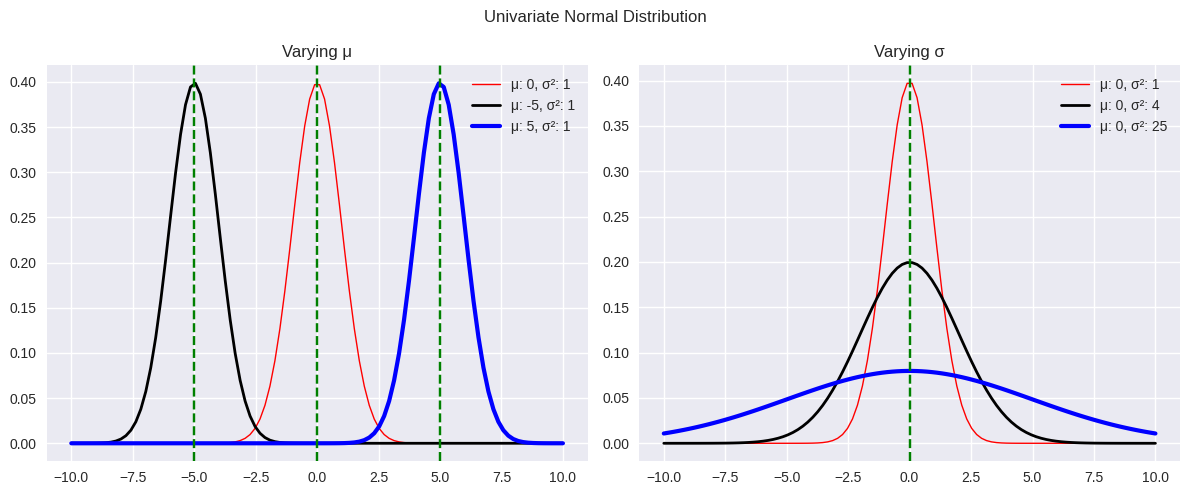

In [3]:
# Moving the mean shifts the distribution to
# right/left while increasing/decresasing the
# variance makes the curve more flat/pointy respectively


x = np.linspace(-10, 10, 100)
#mu: mean ; sigma: standard deviation 
mu_sigma = [#(mu,sigma)
    [(0,1), (-5,1),(5,1)],
    [(0,1),(0,2),(0,5)],
]

#Line colors and widths to be used
# for different combinations
colors = ["red", "black", "blue"]
widths = [1, 2, 3]
subtitles = ["Varying μ", "Varying σ"]

# Plot
_, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12, 5), tight_layout=True)
for i, elem in enumerate(mu_sigma):
    legend = []
    mus = set()
    for j, comb in enumerate(elem):
        mu, sigma = comb
        mus.add(mu)
        legend.append(f"μ: {mu}, σ\u00b2: {sigma**2}")
        ax[i].plot(x, univariate_normal_distribution(x, mu, sigma), linewidth=widths[j], c=colors[j])
        ax[i].tick_params(labelbottom=True)
    
    ax[i].set_title(subtitles[i])
    ax[i].legend(legend, loc="upper right")
    
    for mu in mus:
        ax[i].axvline(x=mu, color="green", linestyle="--")

plt.suptitle("Univariate Normal Distribution")
plt.show()


### Multivariate Normal Distribution
The multivariate normal distribution is a multidimensional generalisation of the one dimensional normal distribution. It represents the distribution of a multivariate random variable(a **vector input**), that is made up of multiple random variables which can be correlated with each other. The $\mu$ represents the **mean** and $\Sigma$ represents the **covariance matrix**.

The PDF for multivariate Normal Distribution is:
$$
p(x,\mu,\Sigma) = \dfrac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}} \exp \big(-\frac{1}{2}(x-\mu)^{\textsf{T}}\Sigma^{-1}(x-\mu)    \big)
$$
- Random variable $X$ =$[x_1,x_2,x_3,...,x_n]$ is a $D$- dimensional vector
- Mean $\mu =[\mu_1,\mu_2,\mu_3,...,\mu_n]$ is a $D$ -dimensional vecotr
- Covariance Matrix $\Sigma$ is a $D \times D$ dimensional matrix

If the vector $X$ is `2-Dimensional` then that distribution is also knows as **Bivariate Normal Distribtuion**.

$\textcolor{red}{\textrm{Note}}$: We need `two dimensions` to visualize a univariate Gaussian, and `three dimesnions` to visualize a bivariate Gaussian

In [4]:
# Using scipy.stats.multivariate_normal 
"""
parameters : mean: default[0]
             cov : default[1]
             allow_singular : default:False
             seed:
            
"""


'\nparameters : mean: default[0]\n             cov : default[1]\n             allow_singular : default:False\n             seed:\n            \n'

In [8]:
from numpy.random import sample


def generate_multivariate_normal(
    mu,
    cov,
    sample=True,
    sample_size=None,
    seed=None,
    generate_pdf=False,
    pos=None
    ):
    """
    Args:
        mu                 : mean vector
        cov                : covriance matrix
        sample(Bool)       : if sampling is required
        seed               : Random Seed
        generate_pdf(Bool) : To generate PDF or not
        pos                : Only when denisty in generated, Values for which density is generated  
    Returns:
        1. Multivariate Distribution
        2. Sample data only if `sample = True`
        3. PDF only if `generate_pdf = True`

    """
    # generate Multivariate Distribution using scipy 
    dist = multivariate_normal(mean=mu, cov=cov , seed=seed)

    #Sampling
    if sample:

        samples = dist.rvs(size=sample_size, random_state=seed)         # rvs: Random Variates
    else:
        
        samples = None
    
    #Density
    if generate_pdf:

        if pos is None:

            raise ValueError("`pos` is required for generating density ")

        else:
            
            pdf = dist.pdf(pos)                                         # pdf: Probability Density Function

    else:
        pdf = None 
    
    return dist, samples, pdf 

mu_x1, mu_x2 = 0, 0       # mean

sigma_x1, sigma_x2 = 1, 1 # standard deviation 

x1, x2 = np.mgrid[
    (-3.0 * sigma_x1 + mu_x1) : (3.0 * sigma_x1 + mu_x1) : 0.1, # start : stop : step_size
    (-3.0 * sigma_x2 + mu_x2) : (3.0 * sigma_x2 + mu_x2) : 0.1
]


pos = np.dstack((x1,x2))

mu = [mu_x1, mu_x2]

cov_x1_x2 = 0 

cov = [[sigma_x1**2, cov_x1_x2], [cov_x1_x2, sigma_x2**2]] # covariance matrix

sample = generate_multivariate_normal(
    mu=mu,
    cov=cov,
    sample=False,
    seed=seed,
    generate_pdf=True,
    pos=pos

)


# Plot

fig = go.Figure(
    go.Surface(
        z=sample[2],
        x=x1,
        y=x2,
        colorscale='Viridis',
        showscale=False
    )
)
fig.update_layout(
    {
        "title": dict(
            text="Bivariate Distribution",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12)
        ), 
        "scene":dict(
            xaxis=dict(title='x1'),
            yaxis=dict(title='x2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)
fig.show()







### Covariance :
The covariance between for eg: two random variables $X$ and $Y$ will be :
$$
\text{COV}(X,Y) = \mathbb{E}\big[(X - \mathbb{E}(X))(Y- \mathbb{E}(Y)) \big] = \mathbb{E}[XY]-\mathbb{E}(X)\mathbb{E}(Y)
$$
Covariance is the expected value of the product of their deviation from their individual [expected values](https://en.wikipedia.org/wiki/Expected_value) (or mean) .

Propertities of **covariance** :
- Covariance gives a sense of how much two random variables as well their scales are **linearly** related.
- Covariance captures only linear dependence and gives no information about other kind of relationships
- If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (that is, the variables tend to show opposite behavior), the covariance is negative.
- If two variables `X` and `Y` are **independent**, then $Cov(X, Y)= 0$ because $\mathbb{E}[XY]= \mathbb{E}[X]\cdot \mathbb{E}[Y]$ but the reverse isn't true. Why? Because covariance doesn't take into account non-linear relationships.
  - Let `X` be uniformly distribute in [-1, 1] and let's say that $Y = X^2$. Clearly, `X` and `Y` are **not independent**, but
  $$\begin{aligned}
  \text{cov}(X,Y) &= \text{cov}(X,X^2)\\
  &=\mathbb{E}[X \cdot X^2]- \mathbb{E}[X]\cdot\mathbb{E}[X^2]\\
  &=\mathbb{E}[X^3]-\mathbb{E}[X]\mathbb{E}[X^2]\\
  &= 0-0 \cdot\mathbb{E}[X^2]\\
  &=0\\
  \end{aligned}$$

  - In this case, the relationship b/w $Y$ and $X$ is **non-linear** , while correlation and covariance are measures of $\textcolor{red}{\text{linear dependence}}$ between two random variables.
  - This examples shows that if two random variables are uncorrelated, that does not imply that they are independent. However, if two variable are  [jointly normally distributed](https://en.wikipedia.org/wiki/Multivariate_normal_distribution), $\underline{\textrm{uncorrelatedness does imply independence}}$.


### Covariance Matrix :
Convariance matrix is a square matrix giving the covariance b/w each pair of the elements of given random vector.
Any covariance matrix is symmetric and [positive semi-definite](https://en.wikipedia.org/wiki/Definite_matrix) and it's main diagonal contains variances(.i.e the covariance of each element with itself).

For example if `X` us a `N`-dimensional vector (.i.e `X` $= [x_1,x_2,....,x_n]$), the covariance matrix is a `NxN`(square) matrix defined as:
$$
\begin{bmatrix}
\text{Cov}(x_{1}x_{1}) & \cdots & \text{Cov}(x_{1}x_{n}) \\
\vdots & \ddots & \vdots \\
\text{Cov}(x_{n}x_{1}) & \cdots & \text{Cov}(x_{n}x_{n})
\end{bmatrix}
$$

Each entry $(i, j)$ in the matrix defines the covariance of two random variable of the vector.
$$
\text{Cov}(x_i , x_j) = \text{Var}(x_i) \ \{ i=j\}
$$





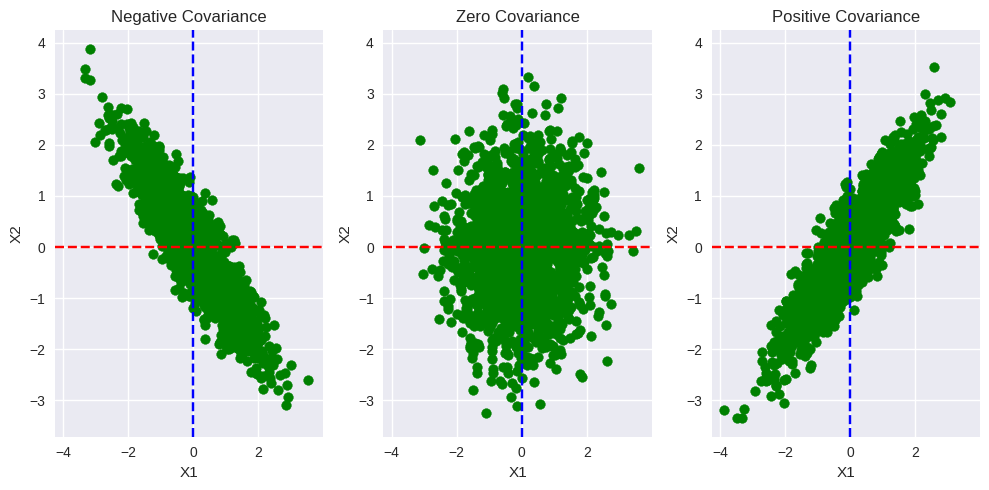

In [18]:
# Examples of Covariance [positive, negative, zero]

from matplotlib.pyplot import title


mu_x1, mu_x2 =0,0

sigma_x1, sigma_x2 = 1,1

sample_size = 2000

x1, x2 = np.mgrid[
    (-3.0 * sigma_x1 + mu_x1):(3.0 * sigma_x1 + mu_x1): 0.1,
    (-3.0 * sigma_x2 + mu_x2):(3.0 * sigma_x2 + mu_x2): 0.1
]

pos = np.dstack((x1, x2))

# Mean vector
mu = [mu_x1, mu_x2]


# Zero Covariance

cov_x1_x2 = 0
zero_cov = [[sigma_x1**2, cov_x1_x2], [cov_x1_x2, sigma_x2**2]]


zero_cov_gen = generate_multivariate_normal(
    mu=mu,
    cov=zero_cov,
    sample=True,
    sample_size=sample_size,
    seed=seed,
    generate_pdf=True,
    pos=pos,
)


# Positive Covariance 

cov_x1_x2= 0.9
pos_cov = [[sigma_x1**2, cov_x1_x2], [cov_x1_x2, sigma_x2**2]]

pos_cov_gen = generate_multivariate_normal(
    mu=mu,
    cov=pos_cov,
    sample=True,
    sample_size=sample_size,
    seed=seed,
    generate_pdf=True,
    pos=pos
)


# Negative Covariance 

cov_x1_x2= -0.9
neg_cov = [[sigma_x1**2, cov_x1_x2], [cov_x1_x2, sigma_x2**2]]

neg_cov_gen = generate_multivariate_normal(
    mu=mu,
    cov=neg_cov,
    sample=True,
    sample_size=sample_size,
    seed=seed,
    generate_pdf=True,
    pos=pos
)

# Plot

_, ax = plt.subplots(1,3, figsize=(10,5), sharex=True, sharey=True)

samples = [neg_cov_gen[1], zero_cov_gen[1], pos_cov_gen[1]]
titles = ["Negative Covariance", "Zero Covariance", "Positive Covariance"]

for i in range(3):
    ax[i].scatter(samples[i][:, 0], samples[i][:, 1], c="green")
    ax[i].set_xlabel("X1")
    ax[i].set_ylabel("X2")
    ax[i].set_title(titles[i])
    ax[i].tick_params(labelleft=True)
    ax[i].axvline(x=mu[0], color="blue", linestyle="--")
    ax[i].axhline(y=mu[1], color="red", linestyle="--")

plt.tight_layout()
#plt.savefig(os.path.join(SAVE_PLOT_DIR, "covariance_pair_plot.png"))
plt.show()



In [11]:
print(
    x1,
    x2,
    pos,
    sep='\n{}\n'.format('\N{box drawings light horizontal}' * 60),
    )

[[-3.  -3.  -3.  ... -3.  -3.  -3. ]
 [-2.9 -2.9 -2.9 ... -2.9 -2.9 -2.9]
 [-2.8 -2.8 -2.8 ... -2.8 -2.8 -2.8]
 ...
 [ 2.7  2.7  2.7 ...  2.7  2.7  2.7]
 [ 2.8  2.8  2.8 ...  2.8  2.8  2.8]
 [ 2.9  2.9  2.9 ...  2.9  2.9  2.9]]
────────────────────────────────────────────────────────────
[[-3.  -2.9 -2.8 ...  2.7  2.8  2.9]
 [-3.  -2.9 -2.8 ...  2.7  2.8  2.9]
 [-3.  -2.9 -2.8 ...  2.7  2.8  2.9]
 ...
 [-3.  -2.9 -2.8 ...  2.7  2.8  2.9]
 [-3.  -2.9 -2.8 ...  2.7  2.8  2.9]
 [-3.  -2.9 -2.8 ...  2.7  2.8  2.9]]
────────────────────────────────────────────────────────────
[[[-3.  -3. ]
  [-3.  -2.9]
  [-3.  -2.8]
  ...
  [-3.   2.7]
  [-3.   2.8]
  [-3.   2.9]]

 [[-2.9 -3. ]
  [-2.9 -2.9]
  [-2.9 -2.8]
  ...
  [-2.9  2.7]
  [-2.9  2.8]
  [-2.9  2.9]]

 [[-2.8 -3. ]
  [-2.8 -2.9]
  [-2.8 -2.8]
  ...
  [-2.8  2.7]
  [-2.8  2.8]
  [-2.8  2.9]]

 ...

 [[ 2.7 -3. ]
  [ 2.7 -2.9]
  [ 2.7 -2.8]
  ...
  [ 2.7  2.7]
  [ 2.7  2.8]
  [ 2.7  2.9]]

 [[ 2.8 -3. ]
  [ 2.8 -2.9]
  [ 2.8 -2.8]
  ...


In [19]:
# Negative Covariance - pdf chnages with respect to covariance
fig = go.Figure(
    go.Surface(
        z=neg_cov_gen[2],
        x=x1,
        y=x2,
        colorscale='Hot',
        showscale=False
    )
)
fig.update_layout(
    {
        "title": dict(
            text=f"Bivariate Distribution<br>cov_x1x2: {neg_cov[0][1]:.2f}",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12)
        ), 
        "scene":dict(
            xaxis=dict(title='X1'),
            yaxis=dict(title='X2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)

In [20]:
fig = go.Figure(
    go.Surface(
        z=zero_cov_gen[2],
        x=x1,
        y=x2,
        colorscale='Viridis',
        showscale=False
    )
)
fig.update_layout(
    {
        "title": dict(
            text=f"Bivariate Distribution<br>cov_x1x2: {zero_cov[0][1]:.2f}",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12)
        ), 
        "scene":dict(
            xaxis=dict(title='X1'),
            yaxis=dict(title='X2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)


In [21]:
# if a value in variable X is higher, it is expected to be high in the corresponding value in variable Y too. In short, there is a positive relationship between them.

fig = go.Figure(
    go.Surface(
        z=pos_cov_gen[2],
        x=x1,
        y=x2,
        showscale=False
    )
)
fig.update_layout(
    {
        "title": dict(
            text=f"Bivariate Distribution<br>cov_x1x2: {pos_cov[0][1]:.2f}",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12)
        ), 
        "scene":dict(
            xaxis=dict(title='X1'),
            yaxis=dict(title='X2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)


- The plot with zero covariance is circular in every direction.
- The plots with negative and positive covariances are more flattened on the 45-degree line, and are somewhat in a perpendicular direction to that line visually.

### Size of the covariance :
Unlike correlation, covariance values do not have a limit between -1 and 1. Therefore, it may be wrong to conclude that there might be a high relationship between variables when the covariance is high. The size of covariance values depends on the difference between values in variables. For instance, if the values are between 1000 and 2000 in the variable, it possible to have high covariance. However, if the values are between 1 and 2 in both variables, it is possible to have a low covariance. Therefore, we can’t say the relationship in the first example is stronger than the second. The covariance stands for only the variation and relation direction between two variables.

Source: [Interpretation of covariance in detail](https://towardsdatascience.com/5-things-you-should-know-about-covariance-26b12a0516f1)


### Isotropic Gaussian 
An `isotropic gaussian` is one where the covariance matrix is represented by the simplified matrix 
$$
\Sigma = \sigma^{2} I
$$

This differs from our traditional gaussian distribution $\mathcal{N}\bm{(\mu,\Sigma)}$ where $\mu$ is the `mean` and $\Sigma$ is the covariance matrix.

$\bm{\mu}$ will have `linear` growth while $\bm{\Sigma}$ will have a `quadratic` one!

As this quadratic growth can be computationally expenise , so $\Sigma$ is often restricted as $\Sigma = \sigma^{2}I$ where , $\sigma^{2}I$ is a $\textcolor{red}{\textrm{scalar variance multiplied by identity matrix}}$

- This will results in $\Sigma$ where  **variance along each dimension is equal**. Hence an isotropic multivariate Gaussian is circular or spherical.
- Covariance matrix is `Diagonal`.
- The distribution can be represented as a product of univariate Gaussians .i.e. $\text{P}(X) = \text{P}(x_1)\text{P}(x_2)...$

In [22]:
#isotropic gaussian


mu_x1, mu_x2 =0,0

sigma_x1, sigma_x2 = 1,1

sample_size = 5000

x1, x2 = np.mgrid[
    (-3.0 * sigma_x1 + mu_x1):(3.0 * sigma_x1 + mu_x1): 0.1,
    (-3.0 * sigma_x2 + mu_x2):(3.0 * sigma_x2 + mu_x2): 0.1
]

pos = np.dstack((x1, x2))

# Mean vector
mu = [mu_x1, mu_x2]


# Zero Covariance

cov_x1_x2 = 0
cov = [[sigma_x1**2, cov_x1_x2], [cov_x1_x2, sigma_x2**2]]

isotropic_gaussian = generate_multivariate_normal(
    mu=mu,
    cov=cov,
    sample=True,
    sample_size=sample_size,
    seed=seed,
    generate_pdf=True,
    pos=pos
)
# Plot

fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=False,
    shared_xaxes=False,
    specs=[[{'type': 'scatter'}, {'type': 'surface'}]],
    subplot_titles=(
        "Covariance x1_x2 = 0.0",
        f"mu_x1: {mu_x1} sigma_x1: {sigma_x1**2} <br>mu_x2: {mu_x2} sigma_x2: {sigma_x2**2}"
    )
)


fig.add_trace(
    go.Scatter(
        x=isotropic_gaussian[1][:, 0],
        y=isotropic_gaussian[1][:, 1],
        mode='markers',
        marker=dict(size=5, color="green"),
    ),
    row=1, col=1
)

fig.add_trace(
    go.Surface(
        z=isotropic_gaussian[2],
        x=x1,
        y=x2,
        colorscale='RdBu',
        showscale=False
    ),
    row=1, col=2
)

fig.update_layout(
    {
        "scene":dict(
            xaxis=dict(title='X1'),
            yaxis=dict(title='X2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": {"title": "X1"},
        "yaxis": {"title": "X2"},
        "title": {"text": "Isotropic Gaussian", "x":0.5, "font":dict(size=20)}
    }
)


### Conditional Distribution :
Let's say we have a multivariate distribution over $$ x \sim \mathcal{N}(\mu,\Sigma) \tag{1}$$
Then, the conditional distribution of any subset vector $x_1$, given the complement vector $x_2$, is also a multivariate normal distribution
$$ p(x_1|x_2) \sim \mathcal{N}(\mu_{1|2}, \Sigma_{1|2}) \tag{2} $$
where the conditional mean and covariance are:

$$
\mu_{1|2} = \mu_1 + \Sigma_{12}\Sigma_{22}^{-1}(x_2-\mu_2)\\

\Sigma_{1|2} = \Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}
\tag{3}
$$
with block-wise mean and covariance defined as:
$$
 
 \mu = \begin{bmatrix}\mu_{1}\\\mu_{2}\end{bmatrix}\\
 \\
 \Sigma = \begin{bmatrix}\Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22}\end{bmatrix} \tag{4}
$$
**Proof:**
Without loss of generality, we assume that in parallel to eq(4):
$$x = \begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} \tag{5}$$
Where $x_1$ is an $n_1 \times 1$ vector, $x_2$ is an $n_2 \times 1$ vector and $x$ is an $n_1+n_2= n \times 1$ vector

By construction , the joint distribution of $x_1$ and $x_2$ is:
$$x_1,x_2 \sim \mathcal{N}(\mu,\Sigma) \tag{6}  $$

Moreover the marginal distribution of $x_2$ follows from eq(1) and eq(4) as:
$$x_2 \sim  \mathcal{N}(\mu_2,\Sigma_{22}) \tag{7}$$

Acc. to law [law of conditional probability](https://statproofbook.github.io/D/prob-cond), it holds that :

$$p(x_1|x_2) = \dfrac{p(x_1,x_2)}{p(x_2)} \tag{8}$$

Applying eq(6) and (7) to eq(8), we have:
$$p(x_1|x_2) =\dfrac{\mathcal{N}(x; \mu,\Sigma)}{\mathcal{N}(x_2; \mu_2,\Sigma_{22})} \tag{9}  $$

Using PDF of the multivariate normal distribution, this becomes :
$$\begin{aligned}
p(x_1|x_2) &= \dfrac{1/\sqrt{(2\pi)^{n}|\Sigma|}\cdot \exp[-\frac{1}{2}(x-\mu)^{\textsf{T}}\Sigma^{-1}(x-\mu)]}{1/\sqrt{(2\pi)^{n_2}|\Sigma_{22}|}\cdot \exp[-\frac{1}{2}(x_2-\mu_2)^{\textsf{T}}\Sigma_{22}^{-1}(x_2-\mu_2)]}\\
&= \frac{1}{\sqrt{(2 \pi)^{n-n_2}}} \cdot \sqrt{\frac{|\Sigma_{22}|}{|\Sigma|}} \cdot \exp \left[ -\frac{1}{2} (x-\mu)^\mathrm{T} \Sigma^{-1} (x-\mu) + \frac{1}{2} (x_2-\mu_2)^\mathrm{T} \Sigma_{22}^{-1} (x_2-\mu_2) \right] \\
\tag{10}
\end{aligned}$$

writing the inverse of $\Sigma$ as :

$$ 
\Sigma^{-1} = \begin{bmatrix} \Sigma^{11} & \Sigma^{12} \\ \Sigma^{21} & \Sigma^{22} \end{bmatrix} \tag{11}
$$

and applying eq(4) to eq(10), we get:

$$\begin{split}
p(x_1|x_2) = &\frac{1}{\sqrt{(2 \pi)^{n-n_2}}} \cdot \sqrt{\frac{|\Sigma_{22}|}{|\Sigma|}} \cdot \\
&\exp \left[ -\frac{1}{2} \left( \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix} \right)^\mathrm{T} \begin{bmatrix} \Sigma^{11} & \Sigma^{12} \\ \Sigma^{21} & \Sigma^{22} \end{bmatrix} \left( \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix} \right) \right. \\
&\hphantom{\exp \left[\right.} \left. + \frac{1}{2} \, (x_2-\mu_2)^\mathrm{T} \, \Sigma_{22}^{-1} \, (x_2-\mu_2) \right] \; 
\end{split}
\tag{12}
$$

Multiplying out within the exponent of eq(12), we have

$$
\begin{aligned}
p(x_1|x_2) = &\frac{1}{\sqrt{(2 \pi)^{n-n_2}}} \cdot \sqrt{\frac{|\Sigma_{22}|}{|\Sigma|}} \cdot \\ &\exp \big[ -\frac{1}{2} \big( (x_1-\mu_1)^\mathrm{T} \Sigma^{11} (x_1-\mu_1) + 2 (x_1-\mu_1^\mathrm{T} \Sigma^{12} (x_2-\mu_2) \\
&+ (x_2-\mu_2)^\mathrm{T} \Sigma^{22} (x_2-\mu_2)\big)++ \frac{1}{2} (x_2-\mu_2)^\mathrm{T} \Sigma_{22}^{-1} (x_2-\mu_2)\big]
\tag{13}
\end{aligned}$$


where we have used the fact that ${\Sigma^{21}}^\mathrm{T} = \Sigma^{12}$, because $\Sigma^{-1}$ is a symmetric matrix.

<br>
The inverse of a block matrix is

$$ 
\begin{bmatrix} A & B \\ C & D \end{bmatrix}^{-1} = \begin{bmatrix} (A-BD^{-1}C)^{-1} & -(A-BD^{-1}C)^{-1}BD^{-1} \\ -D^{-1}C(A-BD^{-1}C)^{-1} & D^{-1}+D^{-1}C(A-BD^{-1}C)^{-1}BD^{-1} \end{bmatrix} \ \tag{14}
$$
thus the inverse of $\Sigma$ in eq(11) is

$$
\begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1} = \begin{bmatrix} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} & -(\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} \Sigma_{12} \Sigma_{22}^{-1} \\ -\Sigma_{22}^{-1} \Sigma_{21} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} & \Sigma_{22}^{-1} + \Sigma_{22}^{-1} \Sigma_{21} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} \Sigma_{12} \Sigma_{22}^{-1} \end{bmatrix} \; \tag{15}
$$
Pluggin in eq(13) we have:

$$ 
\begin{split}
p(x_1|x_2) = &\frac{1}{\sqrt{(2 \pi)^{n-n_2}}} \cdot \sqrt{\frac{|\Sigma_{22}|}{|\Sigma|}} \cdot \\
&\exp \left[ -\frac{1}{2} \left( (x_1-\mu_1)^\mathrm{T} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} (x_1-\mu_1) \right. \right. - \\
&\hphantom{\exp \left[ -\frac{1}{2} \left( \right. \right.} 2 (x_1-\mu_1)^\mathrm{T} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} \Sigma_{12} \Sigma_{22}^{-1} (x_2-\mu_2) + \\
&\hphantom{\exp \left[ -\frac{1}{2} \left( \right. \right.} \left. (x_2-\mu_2)^\mathrm{T} \left[ \Sigma_{22}^{-1} + \Sigma_{22}^{-1} \Sigma_{21} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} \Sigma_{12} \Sigma_{22}^{-1} \right] (x_2-\mu_2) \right) \\
&\hphantom{\exp \left[\right.} \left. + \frac{1}{2} \left( (x_2-\mu_2)^\mathrm{T} \Sigma_{22}^{-1} (x_2-\mu_2) \right) \right] \; \tag{16}
\end{split}
$$


Eliminating some terms, we have:


$$
\begin{split}
p(x_1|x_2) = &\frac{1}{\sqrt{(2 \pi)^{n-n_2}}} \cdot \sqrt{\frac{|\Sigma_{22}|}{|\Sigma|}} \cdot \\
&\exp \left[ -\frac{1}{2} \left( (x_1-\mu_1)^\mathrm{T} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} (x_1-\mu_1) \right. \right. - \\
&\hphantom{\exp \left[ -\frac{1}{2} \left( \right. \right.} 2 (x_1-\mu_1)^\mathrm{T} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} \Sigma_{12} \Sigma_{22}^{-1} (x_2-\mu_2) + \\
&\hphantom{\exp \left[ -\frac{1}{2} \left( \right. \right.} \left. \left. (x_2-\mu_2)^\mathrm{T} \Sigma_{22}^{-1} \Sigma_{21} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} \Sigma_{12} \Sigma_{22}^{-1} (x_2-\mu_2) \right) \right] \; 
\end{split} \tag{17}
$$


Rearranging the terms, we have

$$ 
\begin{split}
p(x_1|x_2) = &\frac{1}{\sqrt{(2 \pi)^{n-n_2}}} \cdot \sqrt{\frac{|\Sigma_{22}|}{|\Sigma|}} \cdot \exp \left[ -\frac{1}{2} \cdot \right. \\
&\! \left. \left[ (x_1-\mu_1) - \Sigma_{12} \Sigma_{22}^{-1} (x_2-\mu_2) \right]^\mathrm{T} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} \left[ (x_1-\mu_1) - \Sigma_{12} \Sigma_{22}^{-1} (x_2-\mu_2) \right] \right] \\
= &\frac{1}{\sqrt{(2 \pi)^{n-n_2}}} \cdot \sqrt{\frac{|\Sigma_{22}|}{|\Sigma|}} \cdot \exp \left[ -\frac{1}{2} \cdot \right. \\
&\! \left. \left[ x_1 - \left( \mu_1 + \Sigma_{12} \Sigma_{22}^{-1} (x_2-\mu_2) \right) \right]^\mathrm{T} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} \left[ x_1 - \left( \mu_1 + \Sigma_{12} \Sigma_{22}^{-1} (x_2-\mu_2) \right) \right] \right]
\end{split}\raisebox{0.005em}{\tag{18}}
$$
where we have used the fact that $\Sigma_{21} = \Sigma_{12}^\mathrm{T}$, because $\Sigma$ is a `covariance matrix`.

<br>
The determinant of a block matrix is

$$ 
\begin{vmatrix} A & B \\ C & D \end{vmatrix} = |D| \cdot | A - B D^{-1} C | \ \tag{19}
$$

such that we have for $\Sigma$ that
$$
\begin{vmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{vmatrix} = |\Sigma_{22}| \cdot | \Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21} | \; \tag{20}
$$

With this and $n - n_2 = n_1$, we finally arrive at
$$
\begin{split}
p(x_1|x_2) = &\frac{1}{\sqrt{(2 \pi)^{n_1} | \Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21} |}} \cdot \exp \left[ -\frac{1}{2} \cdot \right. \\
&\! \left. \left[ x_1 - \left( \mu_1 + \Sigma_{12} \Sigma_{22}^{-1} (x_2-\mu_2) \right) \right]^\mathrm{T} (\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21})^{-1} \left[ x_1 - \left( \mu_1 + \Sigma_{12} \Sigma_{22}^{-1} (x_2-\mu_2) \right) \right] \right]
\end{split} \tag{21}
$$

which is the [probability density function of a multivariate normal distribution](https://statproofbook.github.io/P/mvn-pdf)

$$ 
\boxed{ p(x_1|x_2) = \mathcal{N}(x_1; \mu_{1|2} \Sigma_{1|2}) } \tag{22}
$$

with the `mean` $\mu_{1 \vert 2}$ and `covariance` $\Sigma_{1 \vert 2}$ given by eq(3)


Another way to prove it can also be found at this: [LINK](https://stats.stackexchange.com/questions/30588/deriving-the-conditional-distributions-of-a-multivariate-normal-distribution)

But why we need to know about **conditional distribution** in the first place?

Let's say you have a process that takes the form of a [**Markov Chain**](https://setosa.io/ev/markov-chains/). For example, the forward process in **Diffusion Models** is one example of such a sequence. Let's write down the equation for the same.
$$
q(x_{1:T}\vert x_{0}) := \prod_{t=1}^{T}q(x_{t}\vert x_{t-1}) :=\prod_{t=1}^{T}\mathcal{N}(x_{t};\sqrt{1-\beta_{t}} x_{t-1},\ \beta_{t}\bf I) \tag{1}
$$

This equation tells us a few things:

1. The forward process is a Markov Chain where the sample at the present step depends only on the sample at the previous timestep.
2. The covariance matrix is **diagonal**
3. At each timestep in this sequence, we gradually **add** Gaussian noise. But this isn't very clear from the equation where is this addition taking place, right?
4. The term $\beta$ represents the variance at a *particular timestep `t`* such that $0 < \beta_{1} < \beta_{2} < \beta_{3} < ...  < \beta_{T} < 1$

To understand the last point, let's make some assumptions to simplify the eq (1).<br/>
1. We will ignore the variance schedule $\beta$ for now. We can rewrite the above equation as: $$q(x_{1:T}\vert x_{0}) := \prod_{t=1}^{T}q(x_{t}\vert x_{t-1}) :=\prod_{t=1}^{T}\mathcal{N}(x_{t}; x_{t-1},\ \bf I)  \tag{2}$$
2. We will consider `x` as a univariate normal. This assumption is made only to give readers a better understanding of the conditional Gaussian case. The same concept extends to multivariate normal.

With the above assumptions in mind, combined with the `Law of total probability`, we can write the equation as:

$$p(x_{t}) = \int p(x_{t} \vert \ x_{t-1})p(x_{t-1})dx_{t-1} \tag {3}$$

Using [probability density function for multivariate case](https://statproofbook.github.io/P/mvn-pdf) , we can rewrite this as:
$$p(x_{t}) = \int \mathcal{N}(x_{t}; \ x_{t-1}, 1) p(x_{t-1})dx_{t-1} \tag {4}$$

Because we are dealing with univariate normal, the identity matrix is nothing but a scalar value of 1. Moving forward, we can shift the terms in the above equation like this:
$$p(x_{t}) = \int \mathcal{N}(x_{t} - x_{t-1}; \ 0, 1) p(x_{t-1})dx_{t-1} \tag {5}$$

Notice two things that we got by this shift:
1. The mean and the variance values of the distribution on the right-hand side are `0` and `1` respectively.
2. If you look closely at the term on the RHS in the above equation, you will notice that it is the definition of **convolution**.

Combining the above two facts, we can rewrite *(5)* as:
$$p(x_{t}) = \mathcal{N}(0, 1) \ * \ p(x_{t-1}) \tag {6}$$

**Property**: The convolution of individual distributions of two or more random variables equals the sum of the random variables.

$$ \Longrightarrow x_{t} = \mathcal{N}(0, 1) \ + \ x_{t-1} \tag {7}$$

why conditioned distributions in the forward process of Diffusion models are equivalent to "adding Gaussian noise" to previous timesteps.

### Convolution of probability distributions

Corresponds to the addition of independent random variables and, by extension, to forming linear combinations of random variables.

For eg: if we two normally distributed random variables $X$ and $Y$ and if they're  normally distributed independent random variables such that
$$
X \sim \mathcal{N}\bm{(\mu_{1}, \sigma_{1}^{2})}\\
Y \sim \mathcal{N}\bm{(\mu_{2}, \sigma_{2}^{2})}\\
$$

$$\text{If } Z = X+Y \longrightarrow \boxed{Z \sim  \mathcal{N}\bm{(\mu_{1}+\mu_{2},\sigma_{1}^{2}+ \sigma_{2}^{2})}} \tag{8}$$

**Proof:**
Let $X_1,X_2,...,X_n$ are mutually independent normal random variables with means $\mu_1,\mu_2,..,\mu_n$ and variance $\sigma_{1}^{2},\sigma_{2}^{2},....,\sigma_{n}^{2},$ then `linear combination`: 
$$Y = \displaystyle\sum_{i=1}^{n}c_i X_i$$

follows the normal distribution :
$$
 \mathcal{N} \big(\displaystyle\sum_{i=1}^{n} c_i\mu_i,\displaystyle\sum_{i=1}^{n}c_{i}^{2}\sigma_{i}^{2}  \big) 
$$
We'll use the [The Moment-Generating Function Technique](https://online.stat.psu.edu/stat414/lesson/25) to find the distribution of $Y$.

If $X_i \sim \mathcal{N}(\mu,\sigma^2)$ then the  moment-generating function $X_i$ is:
$$
M_(X_i)(t)=\exp \big(\mu t + \frac{\sigma^2+t^2}{2}          \big)
$$
Therefore, the moment-generating function of $Y$ is:

$$
M_{Y}(t)= \displaystyle \prod_{i=1}^{n} M(X_i)(c_i \ t)=\displaystyle \prod_{i=1}^{n} \exp \big[\mu_i(c_i t)+\frac{\sigma_{i}^{2}t^2}{2} \big]
$$

Evaluating the product at each index from $I$ to $N$, and using what we know about exponents, we get:
$$
M_Y(t)=\text{exp}(\mu_1c_1t) \cdot \text{exp}(\mu_2c_2t) \cdots \text{exp}(\mu_nc_nt) \cdot \text{exp}\left(\dfrac{\sigma^2_1c^2_1t^2}{2}\right) \cdot \text{exp}\left(\dfrac{\sigma^2_2c^2_2t^2}{2}\right) \cdots \text{exp}\left(\dfrac{\sigma^2_nc^2_nt^2}{2}\right)
$$
Again, using what we know about exponents, and rewriting what we have using summation notation, we get:
$$
M_Y(t)=\text{exp}\left[t\left(\sum\limits_{i=1}^n c_i \mu_i\right)+\dfrac{t^2}{2}\left(\sum\limits_{i=1}^n c^2_i \sigma^2_i\right)\right]
$$
We have just shown that the moment-generating function of is the same as the moment-generating function of a normal random variable with mean:

$$
\sum\limits_{i=1}^n c_i \mu_i
$$
and variance:
$$
\sum\limits_{i=1}^n c^2_i \sigma^2_i
$$
Therefore, by the uniqueness property of moment-generating functions, $\bf{Y}$ must be normally distributed with the said mean and said variance.



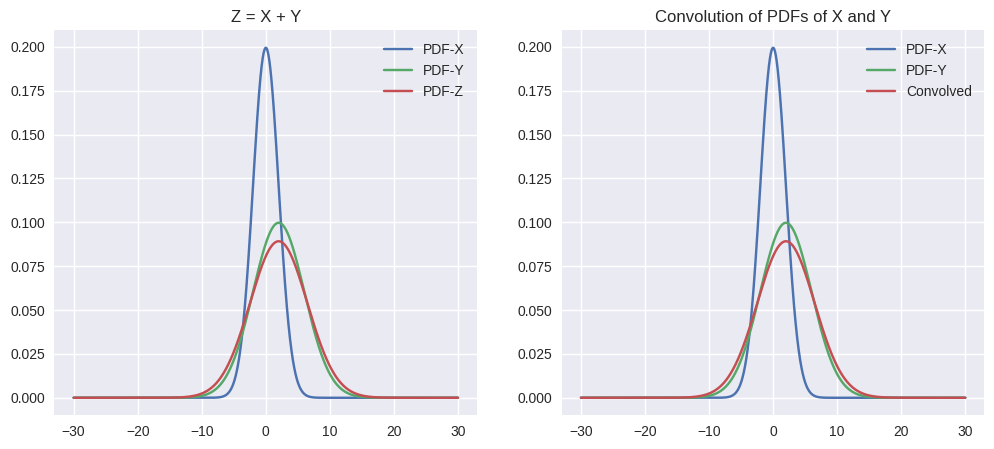

In [23]:
# Mean and Standard deviation of X
mu_x = 0.0
sigma_x = 2.0

# Mean and Standard deviation of Y
mu_y = 2.0
sigma_y = 4.0

# Mean and Standard deviation of Z
mu_z = mu_x + mu_y
sigma_z = np.sqrt(sigma_x**2 + sigma_y**2)

# Get the distributions
dist_x = norm(loc=mu_x, scale=sigma_x)
dist_y = norm(loc=mu_y, scale=sigma_y)
dist_z = norm(loc=mu_z, scale=sigma_z)

# Generate the PDFs
step_size = 1e-4
points = np.arange(-30, 30, step_size)

pdf_x = dist_x.pdf(points)
pdf_y = dist_y.pdf(points)
pdf_z = dist_z.pdf(points)


# NOTE: We cannot convolve over continous functions using `numpy.convolve(...)`
# Hence we will discretize our PDFs into PMFs using the step size we defined above
pmf_x = pdf_x * step_size
pmf_y = pdf_y * step_size

# Convolve the two PMFs
conv_pmf = np.convolve(pmf_x, pmf_y, mode="same")
conv_pdf = conv_pmf / step_size


# Let's plot the distributions now and check if we have gotten
# the same distribution as Z. 
# NOTE: As we have approximated PMF from PDF, there would be
# erros in the approximation. So, the final result may not
# look 100% identical.

_, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12, 5))

ax[0].plot(points, pdf_x)
ax[0].plot(points, pdf_y)
ax[0].plot(points, pdf_z)
ax[0].set_title("Z = X + Y")
ax[0].legend(["PDF-X", "PDF-Y", "PDF-Z"])

ax[1].plot(points, pdf_x)
ax[1].plot(points, pdf_y)
ax[1].plot(points, conv_pdf)
ax[1].set_title("Convolution of PDFs of X and Y")
ax[1].legend(["PDF-X", "PDF-Y", "Convolved"])


### Forward Process in DDPM 

The equation of the forward process : 

$$
q(x_{1:T}\vert x_{0}) := \prod_{t=1}^{T}q(x_{t}\vert x_{t-1}) :=\prod_{t=1}^{T}\mathcal{N}(x_{t};\sqrt{1-\beta_{t}} x_{t-1},\ \beta_{t}\bf I
$$

Here,
- The total number of timesteps `T`
- $\bm{\beta_t}$ will be generated using a schedule. We also have a choice of various schedules but we need to ensure that $(\beta_{1}<\beta_{2},...<\beta_{n})$.
- Sample a new image at timestep `t` from a conditional Gaussian for which the paramters are 

$$

\mu_{t} = \sqrt{1-\beta_{t}} x_{t-1} \text{ and } \sigma_{t}^2 = \beta_{t}
$$

- Above equation can be re-written using properties described in our **Conditional Distribution** secton above:
$$\begin{aligned}
&x_{t} \sim (\mathcal{N}(\sqrt{1-\beta_{t}} x_{t-1},\ \beta_{t}) + \mathcal{N}(0, 1))\\

\Rightarrow &x_{t} = \sqrt{1-\beta_{t}} x_{t-1} + \sqrt{\beta_{t}}\epsilon \ \ ; \ \text{where} \ \epsilon \sim \mathcal{N}(0, 1) 
\end{aligned}$$


Text(0.5, 0.8, 'Forward process in DDPMs')

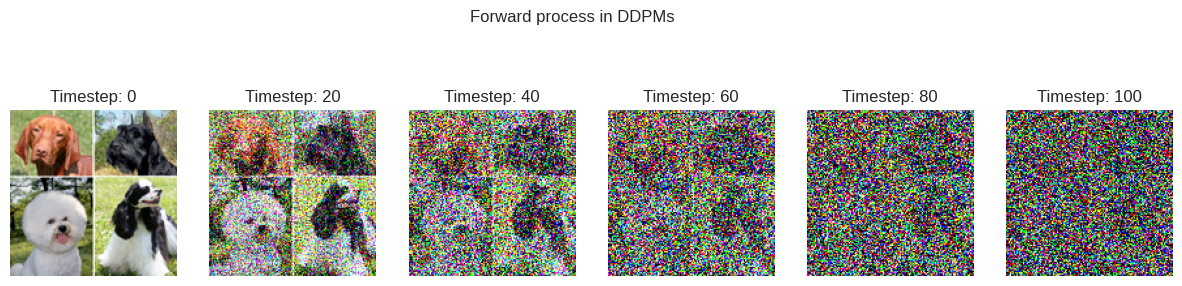

In [39]:
# Forward Process in DDPM
import urllib.request

from numpy import append, asarray, float32, linspace, resize

def forward_process_DDPM(img_t_minus_1, beta, t):
    """Implement the forward Process in DDPM
    Args:
        img_t_minus_1 : Image at previous time-step(t-1)
        beta          : Scheduled Variance
        t             : Current time-step 
    Returns:
        Image obtained at current time-step
    """

    beta_t = beta[t].reshape(-1, 1, 1) # same dim. as our image

    mu = np.sqrt((1.0 - beta_t)) * img_t_minus_1 # mean
    sigma = np.sqrt(beta_t)                      # variance

    img_t = mu + sigma * np.random.randn(*img_t_minus_1.shape)
    """ For random sampling from "Standard Normal" Distribution N(mu,sigma^{2})
    sigma * np.random.randn(...) + mu
    """

    return img_t

urllib.request.urlretrieve(
  'https://upload.wikimedia.org/wikipedia/commons/e/ea/Dog_coat_variation.png',
   "Dog_coat_variation.png")
  
img = Image.open("Dog_coat_variation.png")

IMG_SIZE = (128, 128)

img = img.resize(size=IMG_SIZE)

timesteps = 100

beta_start = .0001
beta_end = .05
beta = np.linspace(beta_start, beta_end, num= timesteps, dtype =np.float32)

processed_img = []


img_t = np.asarray(img.copy(), dtype=np.float32) / 255. 

for t in range(timesteps):
    img_t = forward_process_DDPM(img_t_minus_1=img_t, beta=beta, t=t)
    if t%20==0 or t== (timesteps-1):
        sample = (img_t.clip(0,1) * 255.0).astype(np.uint8)
        processed_img.append(sample)


_, ax = plt.subplots(1, len(processed_img), figsize=(15, 6))

for i, sample in enumerate(processed_img):
    ax[i].imshow(sample)
    ax[i].set_title(f"Timestep: {i*20}")
    ax[i].axis("off")
    ax[i].grid(False)

plt.suptitle("Forward process in DDPMs", y=.80)

### Refrences :
- https://github.com/AakashKumarNain/diffusion_models 

- https://statproofbook.github.io/P/mvn-cond

- https://online.stat.psu.edu/stat414/

- https://online.stat.psu.edu/stat505/

- https://regenerativetoday.com/univariate-and-bivariate-gaussian-distribution-clear-explanation-with-visuals/
- https://apcentral.collegeboard.org/courses/ap-statistics/classroom-resources/why-variances-add-and-why-it-matters

